# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


### Project Steps I think

1. Get Data
2. Clean Data
    a. Make sure all data is the right type
    b. Make sure there are no NaN values
    c. Check for duplicates
    d. Check for outliers
    e. Normalize
3. Figure out which features are important
    a. Check for correlation
    b. RFE
4. Model

look up Crisp-DM and OSEMN

# Getting the data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

# Cleaning the Data

## Check for duplicates

In [5]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value
- No other column could show that there are duplicates


## Changing the column type to be something that makes sense

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [6]:
#Change date from a string to a datetime
df.date = pd.to_datetime(df.date)

In [7]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of ? used. First I will change these to NaN 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?',np.NaN)
df.sqft_basement = df.sqft_basement.astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

## Using IterativeImputer to impute missing values


In [35]:
df_no_date = df.drop(columns = ['date'])
df_no_date.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [86]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df_no_date)
imputed_df = np.round(imp.transform(df_no_date))
imputed_df = pd.DataFrame(imputed_df, columns=df_no_date.columns)
imputed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,221900.0,3.0,1.0,1180.0,5650.0,1.0,-0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,48.0,-122.0,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,48.0,-122.0,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,131.0,98028.0,48.0,-122.0,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,48.0,-122.0,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,48.0,-122.0,1800.0,7503.0


In [37]:
imputed_df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
imputed_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,83.784600,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,367.760789,53.513072,0.460690,0.040258,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,-274.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [57]:
imputed_df.yr_renovated.value_counts()

 0.0       17018
 2014.0       73
 2013.0       31
 2003.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 1990.0       22
 2004.0       22
 82.0         22
-11.0         22
-17.0         21
 2009.0       21
 42.0         20
 104.0        20
 1989.0       20
 2006.0       20
 46.0         20
 9.0          19
-8.0          19
 35.0         19
 136.0        19
 54.0         19
 16.0         19
 20.0         19
-19.0         18
 53.0         18
 8.0          18
 2002.0       17
 34.0         17
           ...  
 594.0         1
 1971.0        1
 792.0         1
-133.0         1
-233.0         1
 291.0         1
 1948.0        1
-179.0         1
 348.0         1
-184.0         1
-108.0         1
 1934.0        1
 756.0         1
 471.0         1
 646.0         1
-232.0         1
 352.0         1
-211.0         1
 259.0         1
-126.0         1
 603.0         1
-165.0         1
 337.0         1
 626.0         1
-172.0         1
 296.0         1
-156.0         1
 1976.0       

This seems to have worked well for every feature except 'yr_renovated'. Since it gives very low years and negatives because so many 0's were already in place. This column will more than likely not be relevant. I'll also drop the index column.

In [92]:
imputed_df = imputed_df.drop(columns = ['id'])

### Edit yr_renovated so that any values below 1900 are 0

In [87]:
imputed_df.yr_renovated = imputed_df.yr_renovated.astype('int64')

In [88]:
imputed_df.loc[imputed_df.yr_renovated < 1900, 'yr_renovated'] = 0

In [89]:
imputed_df.yr_renovated.describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [90]:
imputed_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.460690,0.040258,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [91]:
imputed_df.yr_renovated.value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
2005       29
2000       29
2004       22
1990       22
2009       21
2006       20
1989       20
2002       17
1998       16
1984       16
1991       16
1999       15
2008       15
2010       15
2001       15
1983       15
1986       14
1985       14
1987       14
2015       14
1994       14
1992       13
1995       12
1993       12
1997       12
        ...  
1975        5
1964        5
1963        4
1969        4
1981        4
1965        4
1973        4
1955        3
1956        3
1972        3
1978        3
1960        3
1958        3
1945        3
1962        2
1967        2
1957        2
1974        2
1940        2
1948        1
1959        1
1934        1
1971        1
1954        1
1950        1
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

## Look at data

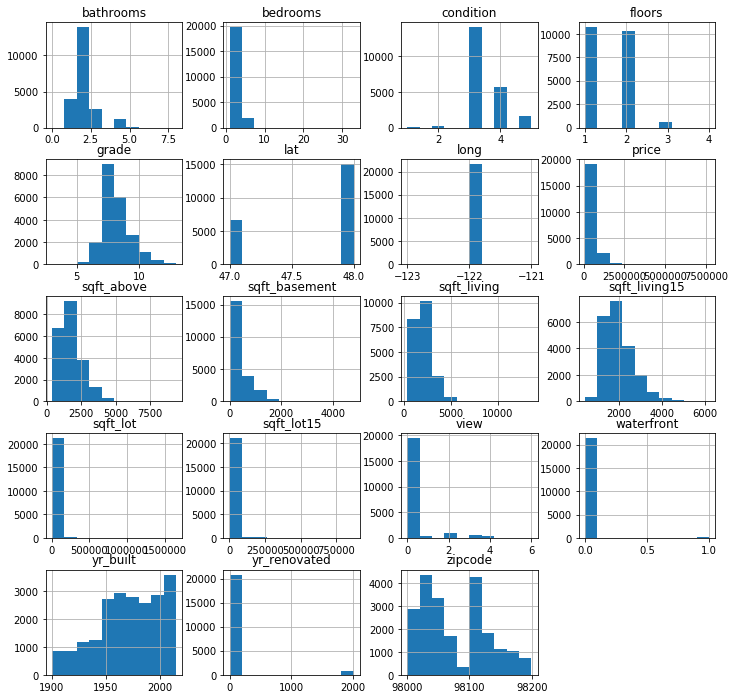

In [93]:
imputed_df.hist(figsize=(12,12));

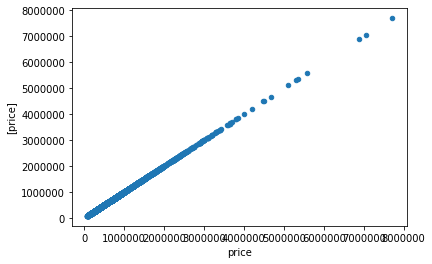

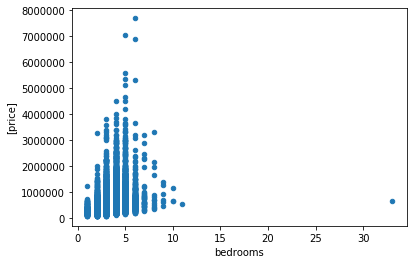

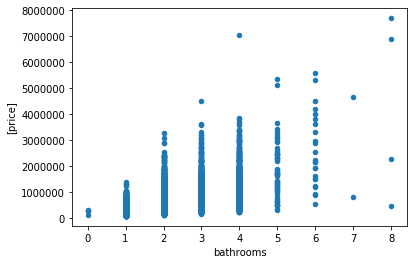

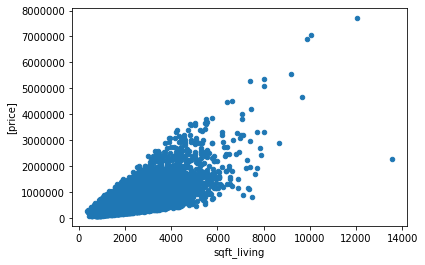

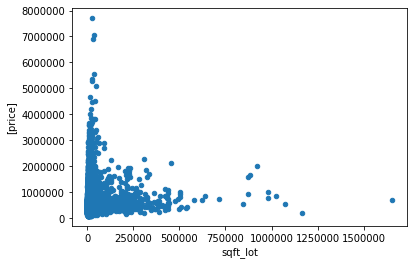

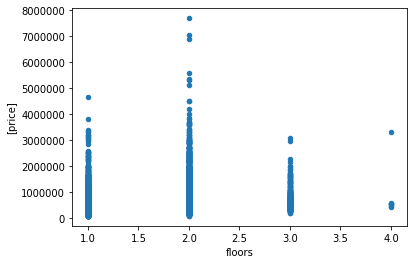

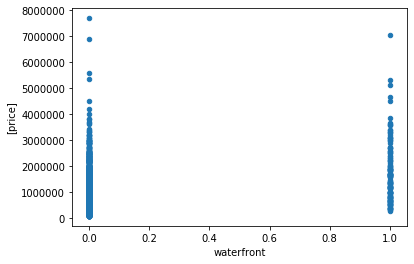

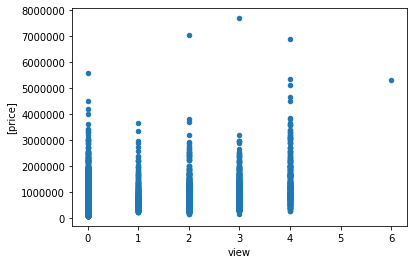

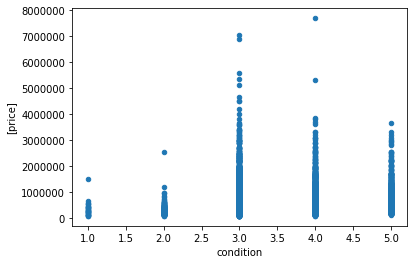

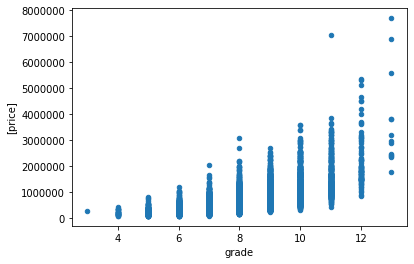

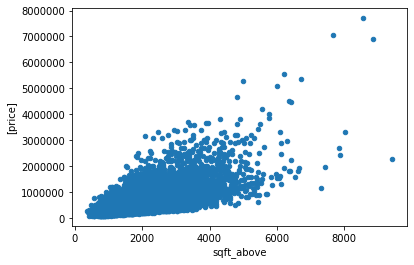

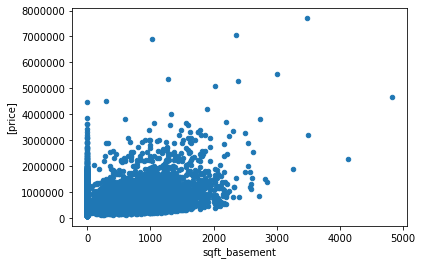

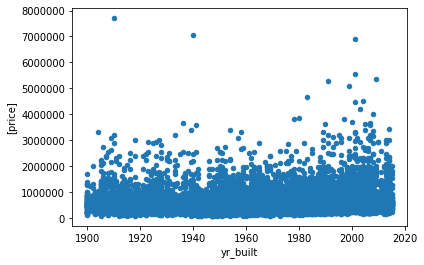

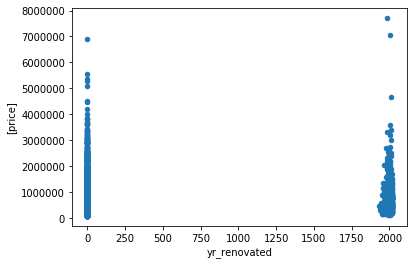

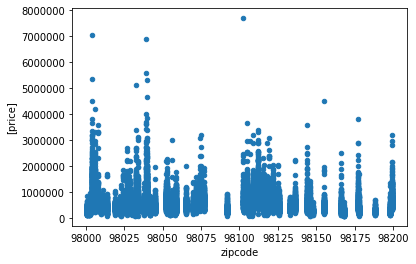

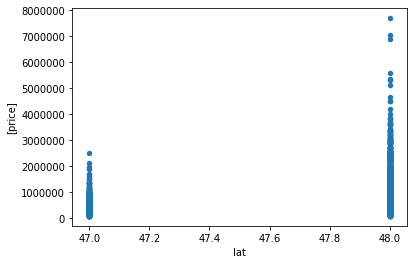

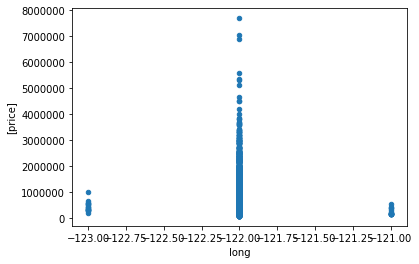

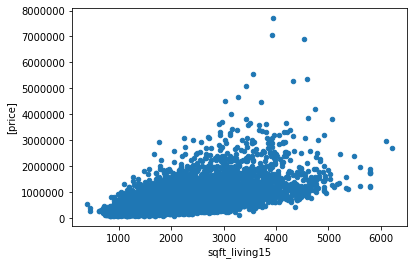

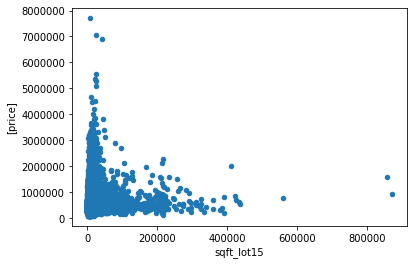

In [94]:
for col in imputed_df:
    imputed_df.plot.scatter(x=col, y=['price'])    

### Observations from scatter plots
- There seem to be a few categorical variables
    -bathrooms
    -floors
    -waterfront
    -view
    -condition
    -grade
    -lat,long

## A Model Using Raw Features

In [29]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in imputed_df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=imputed_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3070.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:53:23   Log-Likelihood:            -2.9412e+05
No. Observations:               21597   AIC:                         5.883e+05
Df Residuals:                   21579   BIC:                         5.884e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.476e+07   4.96e+06      2.978      0.003    5.04e+06    2.45e+07
bedrooms      -3.282e+04   1870.887    -17.541      0.000   -3.65e+04   -2.91e+04
bathrooms      4.141e+04   2716.319     15.246      0.000    3.61e+04    4.67e+04
sqft_living     109.2308      2.199     49.668      0.000     104.920     113.541
sqft_lot          0.1115      0.047      2.360      0.018       0.019       0.204
floors        -1464.1853   3136.095     -0.467      0.641   -7611.163    4682.793
waterfront     6.355e+05    1.8e+04     35.274      0.000       6e+05    6.71e+05
view           5.126e+04   2091.439     24.512      0.000    4.72e+04    5.54e+04
condition      2.845e+04   2332.164     12.198      0.000    2.39e+04     3.3e+04
grade          9.427e+04   2122.312     44.419      0.000    9.01e+04    9.84e+04
sqft_above       72.0682      2.196     32.822      0.000      67.764      76.372
sqft_basement    37.1617      2.561     14.509      0.000      32.142      42.182
yr_built      -2451.8124     66.868    -36.667      0.000   -2582.878   -2320.747
yr_renovated     26.4077      3.973      6.647      0.000      18.620      34.195
zipcode        -215.6088     29.073     -7.416      0.000    -272.594    -158.623
lat            1.979e+05   3221.046     61.445      0.000    1.92e+05    2.04e+05
long          -9189.2660   3.39e+04     -0.271      0.787   -7.57e+04    5.73e+04
sqft_living15    14.0179      3.378      4.150      0.000       7.397      20.639
sqft_lot15       -0.4254      0.072     -5.876      0.000      -0.567      -0.283
==============================================================================
Omnibus:                    19147.456   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2110470.181
Skew:                           3.799   Prob(JB):                         0.00
Kurtosis:                      50.829   Cond. No.                     2.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Deal with Categorical Variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.519628,0.701917,0.089876,0.244832,0.264306,0.398737,0.036056,0.667951,0.605368,0.323799,0.053953,0.138476,-0.053402,0.376140,-0.010656,0.585241,0.082845
bedrooms,0.308787,1.000000,0.487955,0.578212,0.032471,0.180246,-0.002127,0.079797,0.026496,0.356563,0.479386,0.302808,0.155670,0.019138,-0.154092,-0.001140,-0.008229,0.393406,0.030690
bathrooms,0.519628,0.487955,1.000000,0.702719,0.090532,0.327893,0.064619,0.203423,-0.068032,0.591830,0.600458,0.334643,0.378287,0.073504,-0.144937,0.088542,-0.006007,0.498534,0.087931
sqft_living,0.701917,0.578212,0.702719,1.000000,0.173453,0.321904,0.104637,0.284489,-0.059445,0.762779,0.876448,0.435130,0.318152,0.058754,-0.199802,0.090380,-0.009300,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.090532,0.173453,1.000000,-0.001542,0.021459,0.075734,-0.008830,0.114731,0.184139,0.015418,0.052946,0.003647,-0.129586,-0.104090,-0.057076,0.144763,0.718204
floors,0.244832,0.180246,0.327893,0.321904,-0.001542,1.000000,0.021331,0.027454,-0.223543,0.408142,0.488437,-0.245707,0.381176,0.015805,-0.022912,0.109851,0.017708,0.242887,-0.010322
waterfront,0.264306,-0.002127,0.064619,0.104637,0.021459,0.021331,1.000000,0.384216,0.016648,0.082818,0.071778,0.082800,-0.024487,0.088137,0.028923,-0.006594,-0.084125,0.083823,0.030658
view,0.398737,0.079797,0.203423,0.284489,0.075734,0.027454,0.384216,1.000000,0.046045,0.251295,0.167760,0.276339,-0.054268,0.110473,0.084783,0.058871,-0.022173,0.280920,0.073797
condition,0.036056,0.026496,-0.068032,-0.059445,-0.008830,-0.223543,0.016648,0.046045,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.068060,0.002888,-0.008921,-0.013420,-0.093072,-0.003126
grade,0.667951,0.356563,0.591830,0.762779,0.114731,0.408142,0.082818,0.251295,-0.146896,1.000000,0.756073,0.168220,0.447865,0.016848,-0.185771,0.171081,-0.008179,0.713867,0.120981


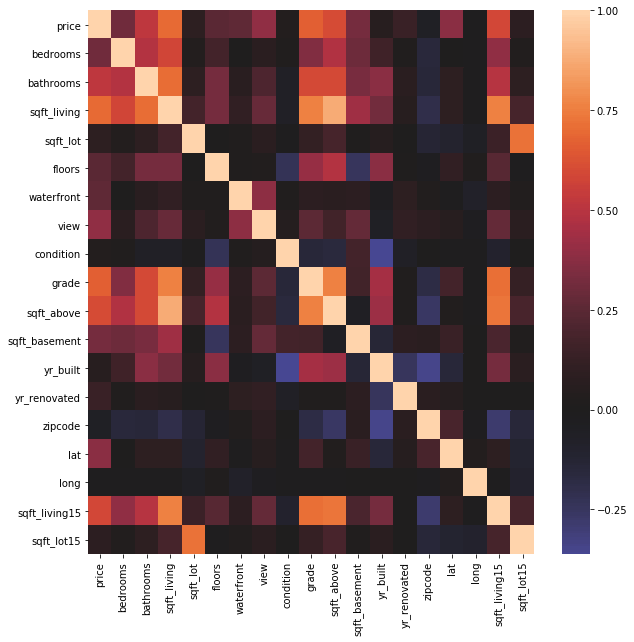

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(imputed_df.corr(), center=0);

## Apply Log Transform to Non-Normal Features
